In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tv = pd.read_csv(r'C:\Users\USER\Desktop\python\ML\1. Simple Linear Regression\tvmarketing.csv')
tv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [4]:
tv.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


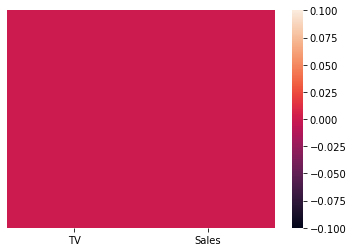

In [5]:
# Check for null values

sns.heatmap(tv.isna(),yticklabels=False)



             TV     Sales
TV     1.000000  0.782224
Sales  0.782224  1.000000


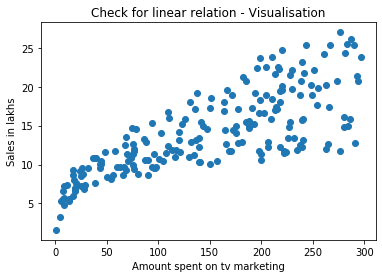

In [6]:
# Check for linear relation
plt.scatter('TV','Sales',data=tv)
plt.xlabel('Amount spent on tv marketing')
plt.ylabel('Sales in lakhs')
plt.title('Check for linear relation - Visualisation')
print('\n')
print(tv.corr())

In [7]:
# Data split

import statsmodels.api as sm

X = sm.add_constant(tv[['TV']])
y = tv['Sales']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
# Model

lm = sm.OLS(y_train,X_train).fit()

In [11]:
# Summary
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.634   
Dependent Variable: Sales            AIC:                783.7396
Date:               2020-05-20 19:09 BIC:                789.7609
No. Observations:   150              Log-Likelihood:     -389.87 
Df Model:           1                F-statistic:        259.5   
Df Residuals:       148              Prob (F-statistic): 2.29e-34
R-squared:          0.637            Scale:              10.738  
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    6.5947      0.5301    12.4400    0.0000    5.5471    7.6423
TV       0.0503      0.0031    16.1099    0.0000    0.0441    0.0565
-----------------------------------------------------------------
Omnibus:               0.447        Durbin-Watson:          1.845
Prob(Omnibus):         0.800        Jarque-Bera (JB):       0.481
Skew:                  -0.128       Prob(JB):               0.786
Kurtosis:              2.895        Condition No.:          336  
=================================================================

"""

In [12]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler = scaler.fit_transform(tv)

In [15]:
df = pd.DataFrame(data=scaler , columns=tv.columns)

In [16]:
df

,TV,Sales
0,0.775786,0.807087
1,0.148123,0.346457
2,0.055800,0.303150
3,0.509976,0.665354
4,0.609063,0.444882
...,...,...
195,0.126818,0.236220
196,0.316199,0.318898
197,0.596212,0.440945
198,0.956713,0.940945


In [17]:
# Data split

import statsmodels.api as sm

X = sm.add_constant(df[['TV']])
y = df['Sales']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [19]:
# Model after scaling

lm2 = sm.OLS(y_train,X_train).fit()

In [20]:
# Summary - 2

lm2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.623    
Dependent Variable: Sales            AIC:                -184.6324
Date:               2020-05-20 19:09 BIC:                -178.6111
No. Observations:   150              Log-Likelihood:     94.316   
Df Model:           1                F-statistic:        247.6    
Df Residuals:       148              Prob (F-statistic): 2.09e-33 
R-squared:          0.626            Scale:              0.016874 
---------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const     0.2087      0.0214     9.7292    0.0000    0.1663    0.2510
TV        0.5831      0.0371    15.7349    0.0000    0.5099    0.6563
------------------------------------------------------------------
Omnibus:              2.172         Durbin-Watson:           2.054
Prob(Omnibus):        0.338         Jarque-Bera (JB):        1.722
Skew:                 -0.097        Prob(JB):                0.423
Kurtosis:             2.513         Condition No.:           4    
==================================================================

"""

In [21]:
# Outlier Analysis

from scipy.stats import zscore
df['zscore'] = zscore(df['Sales'])
print(df[df['zscore'] > 3.0])
print(df[df['zscore']< -3.0])

Empty DataFrame
Columns: [TV, Sales, zscore]
Index: []
Empty DataFrame
Columns: [TV, Sales, zscore]
Index: []


# Residual Analysis

Text(0.5, 1.0, 'Residuals normality check')

<Figure size 576x432 with 0 Axes>

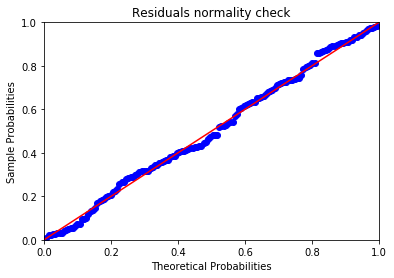

In [22]:
# Normality Check

resid = lm2.resid_pearson
plt.figure(figsize=(8,6))
x= sm.ProbPlot(resid)
x.ppplot(line='45')
plt.title('Residuals normality check')

In [23]:
# Test for homoscedasticity

def std(vals):
    return (vals-vals.mean()) / vals.std()

Text(0.5, 1.0, 'Test for homoscedasticity')

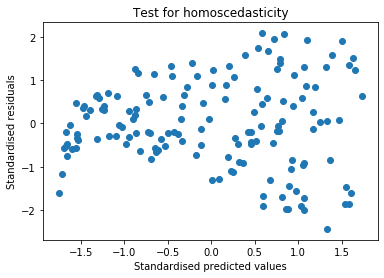

In [24]:
plt.scatter(std(lm2.fittedvalues) , std(lm2.resid))
plt.xlabel('Standardised predicted values')
plt.ylabel('Standardised residuals')
plt.title('Test for homoscedasticity')

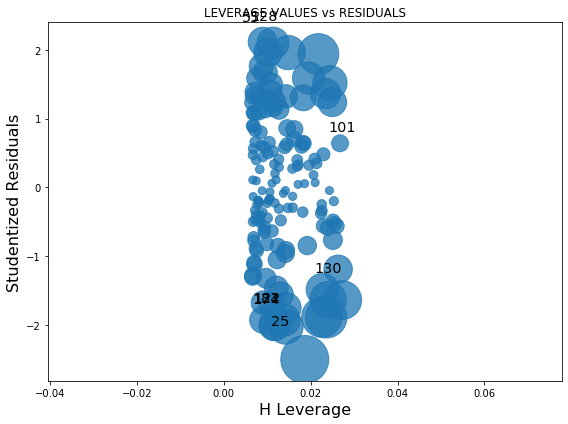

In [25]:
# Influence plot

from statsmodels.graphics.regressionplots import influence_plot

fig,ax = plt.subplots(figsize=(8,6))
influence_plot(lm2 , ax = ax)
plt.title('LEVERAGE VALUES vs RESIDUALS')
plt.tight_layout()

In [26]:
# Predictions

pred = lm2.predict(X_test)

In [27]:
# Performance Metrics

from sklearn import metrics

print('MSE : {}'.format(metrics.mean_squared_error(y_test,pred)))

MSE : 0.01579379890376298


In [28]:
print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,pred))))

RMSE : 0.125673381842628


In [29]:
print('R - sq : {}'.format(metrics.r2_score(y_test,pred)))

R - sq : 0.5130964820543731


# TRANSFORMATION TECHNIQUES

In [30]:
final_df = df

In [31]:
final_df.drop('zscore',inplace=True,axis=1)

In [32]:
final_df.head()

,TV,Sales
0,0.775786,0.807087
1,0.148123,0.346457
2,0.055800,0.303150
3,0.509976,0.665354
4,0.609063,0.444882


In [33]:
final_df['Sales'] = np.sqrt(final_df['Sales'])

In [34]:
final_df.head()

,TV,Sales
0,0.775786,0.898380
1,0.148123,0.588606
2,0.055800,0.550590
3,0.509976,0.815693
4,0.609063,0.666995


In [35]:
# Data split

import statsmodels.api as sm

X = sm.add_constant(final_df[['TV']])
y = final_df['Sales']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [37]:
# Model after transforming

final_model = sm.OLS(y_train,X_train).fit()

In [38]:
# Final Summary

final_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.620    
Dependent Variable: Sales            AIC:                -265.9903
Date:               2020-05-20 19:09 BIC:                -259.9690
No. Observations:   150              Log-Likelihood:     135.00   
Df Model:           1                F-statistic:        243.9    
Df Residuals:       148              Prob (F-statistic): 4.19e-33 
R-squared:          0.622            Scale:              0.0098096
---------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const     0.4727      0.0155    30.4784    0.0000    0.4421    0.5034
TV        0.4257      0.0273    15.6171    0.0000    0.3718    0.4795
------------------------------------------------------------------
Omnibus:               31.684       Durbin-Watson:          1.756 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       60.816
Skew:                  -0.959       Prob(JB):               0.000 
Kurtosis:              5.461        Condition No.:          4     
==================================================================

"""